In [1]:
#Подключим необходимые библиотеки для нашего анализа
import pandas as pd
import matplotlib.pyplot as plt

# Шаг 1. Загрузка данных

In [2]:
# Загружаем данные
users_go = pd.read_csv('users_go.csv')
rides_go = pd.read_csv('rides_go.csv')
subs = pd.read_csv('subscriptions_go.csv')

In [3]:
display(users_go.head())
display(rides_go.head())
display(subs.head())

,user_id,name,age,city,subscription_type
0,1.0,Кира,22.0,Тюмень,ultra
1,2.0,Станислав,31.0,Омск,ultra
2,3.0,Алексей,20.0,Москва,ultra
3,4.0,Константин,26.0,Ростов-на-Дону,ultra
4,5.0,Адель,28.0,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [4]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            1565 non-null   float64
 1   name               1565 non-null   object 
 2   age                1565 non-null   float64
 3   city               1565 non-null   object 
 4   subscription_type  1565 non-null   object 
dtypes: float64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


In [7]:
display(users_go.describe())
display(rides_go.describe())
display(subs.describe())

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


In [8]:
display(users_go.isna().sum())
display(rides_go.isna().sum())
display(subs.isna().sum())

user_id              1
name                 1
age                  1
city                 1
subscription_type    1
dtype: int64

user_id     0
distance    0
duration    0
date        0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [9]:
display(users_go.duplicated().sum())
display(rides_go.duplicated().sum())
display(subs.duplicated().sum())

31

0

0

#### Вывод
Изучив двнные мы можем увидеть три датасета и сделать выводы по ним:
- users_go | 1566 строк | наверно некоторые столбцы должны перевести на int64 | имеется дубликаты | есть пустые значения
- rides_go | 18608 строк | столбец date надо перевести к типу даты pandas | нет | нет |
- subs | 2 строк | нет | нет | нет |

#### Шаг 2. Предобработка данных

In [10]:
#Переведем столбец date в тип данных datetime 
rides_go['date'] = pd.to_datetime(rides_go['date'])
rides_go['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

In [11]:
# Создать новый столбец с номером месяца на основе столбца date.
rides_go['month_number'] = rides_go['date'].dt.month
rides_go['month_number']

0         1
1         1
2         4
3         8
4         8
         ..
18063    11
18064    11
18065    11
18066    11
18067    12
Name: month_number, Length: 18068, dtype: int32

In [12]:
users_go.isna()

,user_id,name,age,city,subscription_type
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1561,False,False,False,False,False
1562,False,False,False,False,False
1563,False,False,False,False,False
1564,False,False,False,False,False


In [13]:
 # Удалим строку с пропусками 
users_go = users_go.dropna()
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
# удалим явные дубликаты
users_go = (users_go.drop_duplicates().reset_index())

Общий вывод: после предобработки данных теперь мы имеем датафрейм, в котором столбец с датами имеет правильный тип данных, добавлен столбец с номером месяца, а также были устранены пропущенные значения и удалены дубликаты, что позволяет проводить более точный анализ данных.

#### Шаг 3. Исследовательский анализ данных

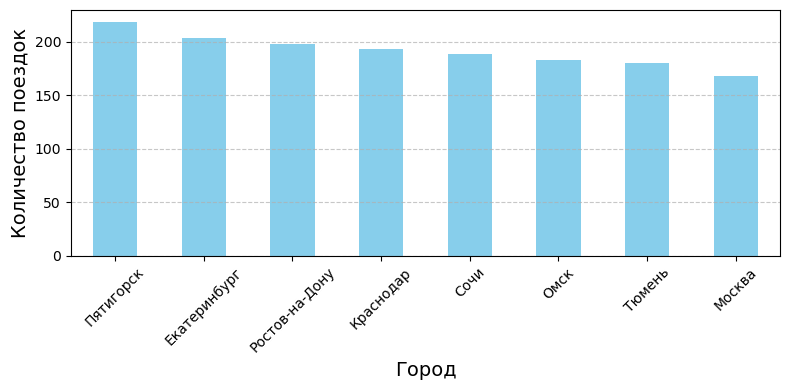

In [15]:
# частота встречаемости городов
city_frequency = users_go['city'].value_counts()
city_frequency.plot(kind='bar', color='skyblue', figsize=(8, 4));
plt.xlabel('Город', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Видим что в Пятигорске самое длинное количество поездок, а самое короткое количество поездок в москве.

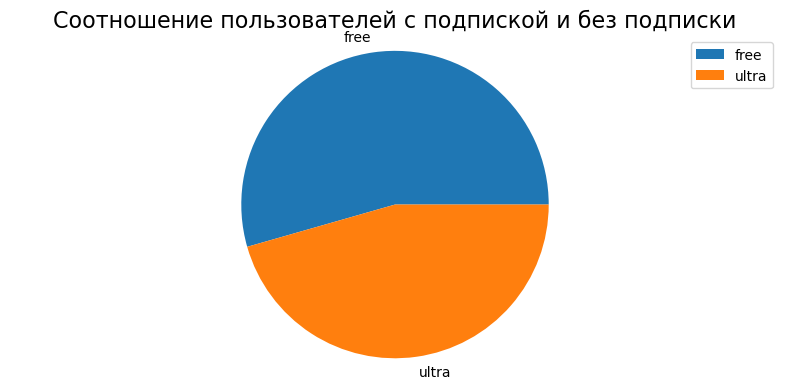

In [16]:
# соотношение пользователей с подпиской и без подписки;
subs_count = users_go['subscription_type'].value_counts()
subs_count.plot(kind='pie', figsize=(8, 4));
plt.title('Соотношение пользователей с подпиской и без подписки', fontsize=16)
plt.ylabel('')  # Убираем название оси Y
plt.axis('equal')  # Позволяет нарисовать круг, а не эллипс
plt.legend(labels=subs_count.index, loc='best')  # Добавляем легенду с местоположением 'best'
plt.tight_layout()

Видим что Пользователи с подпиской free больше чем ultra на 134 пользователей.

In [17]:
# преобразовать значения столбца age из типа float в тип int
users_go['age'] = users_go['age'].astype(int)

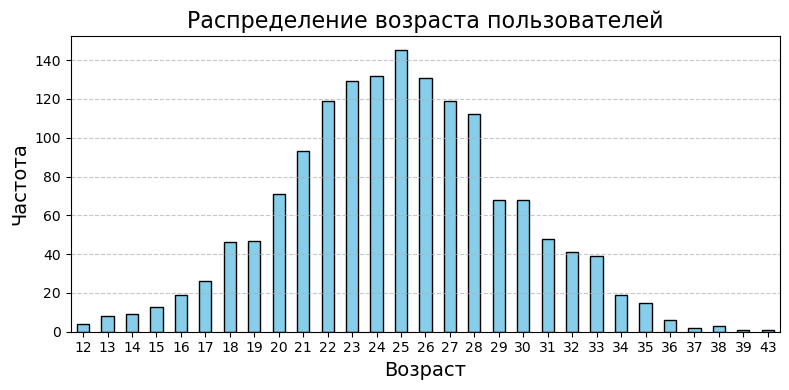

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [18]:
plt.figure(figsize=(8, 4))
users_go['age'].value_counts().sort_index().plot.bar(color='skyblue', edgecolor='black')

# Настройка графика
plt.title('Распределение возраста пользователей', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
users_go['age'].describe()

Таким образом, мы видим, что большинство пользователей (50%) имеют возраст от 22 до 28 лет, при этом средний возраст составляет примерно 25 лет. Однако есть и достаточно молодые (минимальный возраст 12 лет) и старшие (максимальный возраст 43 лет) пользователи в выборке.
Видим что самое большое количество пользователей это люди в возрасте с 22 лет до 28 лет.  

In [19]:
# Метр в КМ
rides_go['distance'] = rides_go['distance'] / 1000
rides_go['distance'].head()

0    4.409919
1    2.617592
2    0.754160
3    2.694783
4    4.028687
Name: distance, dtype: float64

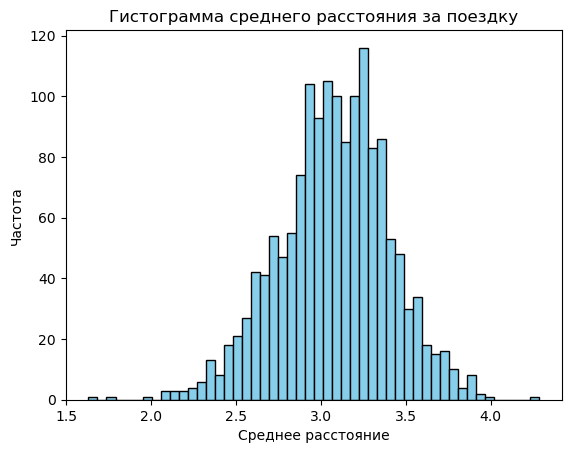

count    1534.000000
mean        3.077297
std         0.327624
min         1.630788
25%         2.882506
50%         3.090864
75%         3.293326
max         4.287519
Name: distance, dtype: float64

In [20]:
# расстояние, которое пользователь преодолел за одну поездку;
average_distance = rides_go.groupby('user_id')['distance'].mean()
plt.hist(average_distance, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Среднее расстояние')
plt.ylabel('Частота')
plt.title('Гистограмма среднего расстояния за поездку')
plt.show()
average_distance.describe()

На основе этих данных можно сделать вывод, что большинство пользователей преодолевают относительно средние расстояния за одну поездку, с небольшим разбросом значений вокруг среднего.

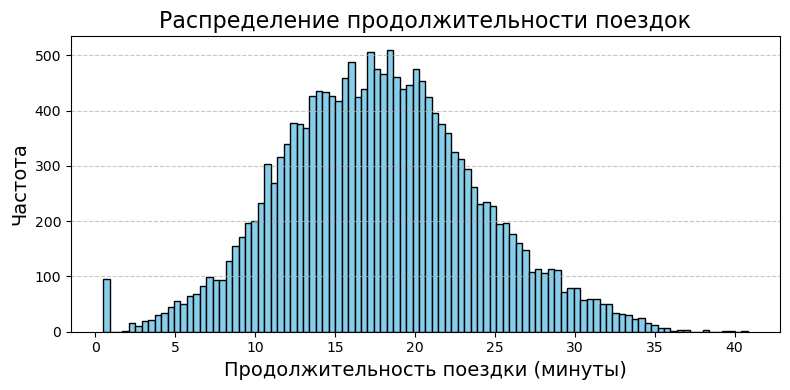

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [21]:
# продолжительность поездок.
plt.figure(figsize=(8, 4))
plt.hist(rides_go['duration'], bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение продолжительности поездок', fontsize=16)
plt.xlabel('Продолжительность поездки (минуты)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
rides_go['duration'].describe()

Мы видим, что большинство поездок (50%) имеют продолжительность от 13.6 до 21.7 минут, средняя продолжительность составляет около 17.7 минут. Однако есть и очень короткие (минимальная продолжительность 0.5 минуты) и довольно длинные (максимальная продолжительность 40.8 минут) поездки в выборке.

#### Общий вывод
В целом, анализ данных о пользователях и их поездках предоставляет ценную информацию о характеристиках и предпочтениях пользователей, а также о характеристиках самих поездок. Вот общий вывод на основе проведенного анализа:

Популярность местности: Пятигорск оказался наиболее популярным городом для поездок, что может указывать на высокий спрос на самокатов в этом регионе. Москва, вероятно, имеет менее высокий спрос на услуги самокатов, по сравнению с другими регионами.

Предпочтения пользователей по тарифам: Большинство пользователей предпочитает бесплатный тариф по сравнению с более дорогим ultra. Это может быть связано с предпочтением более доступных услуг или отсутствием необходимости в дополнительных функциях ultra.

Целевая аудитория сервиса: Большинство пользователей находится в возрасте от 22 до 28 лет, что указывает на популярность сервиса среди молодых взрослых. Это важно для разработки маркетинговых стратегий и управления продуктом.

Характеристики поездок: Большинство поездок имеют средние расстояния и продолжительность, что может свидетельствовать о типичных целях использования самокатов, таких как ежедневные поездки на работу или домой. Однако существуют и более короткие и более длинные поездки, что указывает на разнообразие потребностей пользователей.

Исходя из предоставленных данных, мы можем сделать вывод о том, что сервис самокатов пользуется популярностью среди молодых взрослых, предпочтительнее бесплатный тариф, а типичные поездки имеют среднюю продолжительность и расстояние. 

#### Шаг 4. Объединение данных

In [30]:
# Объединяем данные о пользователях и поездках по общему столбцу (например, user_id)
merged_data = pd.merge(rides_go, users_go, on='user_id', how='left')

# Затем объединяем данные о подписках, также используя общий столбец (например, subscription_type)
merged_data = pd.merge(merged_data, subs, on='subscription_type', how='left')


subscription_type
free     11568
ultra     6500
Name: count, dtype: int64

In [26]:
# Датафрейм с данными о пользователях с подпиской (ultra)
users_ultra = merged_data[merged_data['subscription_type'] == 'ultra']
users_ultra

,user_id,distance,duration,date,month_number,index,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4.409919,25.599769,2021-01-01,1,0,Кира,22,Тюмень,ultra,6,0,199
1,1,2.617592,15.816871,2021-01-18,1,0,Кира,22,Тюмень,ultra,6,0,199
2,1,0.754160,6.232113,2021-04-20,4,0,Кира,22,Тюмень,ultra,6,0,199
3,1,2.694783,18.511000,2021-08-11,8,0,Кира,22,Тюмень,ultra,6,0,199
4,1,4.028687,26.265803,2021-08-28,8,0,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3.973046,24.671163,2021-08-29,8,698,Оксана,22,Москва,ultra,6,0,199
6496,699,3.288703,15.892886,2021-09-12,9,698,Оксана,22,Москва,ultra,6,0,199
6497,699,3.076159,14.389525,2021-09-26,9,698,Оксана,22,Москва,ultra,6,0,199
6498,699,4.707846,15.839579,2021-10-17,10,698,Оксана,22,Москва,ultra,6,0,199


#### Шаг 5. Подсчёт выручки

#### Шаг 6. Проверка гипотез

#### Шаг 7. Распределения